<a href="https://colab.research.google.com/github/thihanaung-thnn/mathematics/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

The History of the **invention** of linear regression is a bit complicated.  

1805 - First public exposition on Linear regression with least squares method published by Adrien-Maire Legendre  

1809 - Carl Friedrich Gauss published his methods of calculating orbits of celestial bodies, claiming to have invented least-squares back in 1795! He was born in 1777, which would make him 18 years old at his proclaimed time of discovery!  

1808 - Robert Adrian published his formulation of least squares (a year before publication by Gauss)

## Intuition 

### What is regression? 
- Statistical models to explore the relationship a response variable and some explanatory variables
- Given values of explanatory variables, you can predict the values of the response variable 

### Terms before starting 

> **Response variable** - the variable that you want to predict 

> **Explanatory variable** - the variables that explain how the response variable will change  

> **Linear Regression** - the response variable is numeric  

> **Simple linear regression** - there is only one explanatory variable (I will focus on simple linear regression as it is easy to interpret with graphs.

**Straight lines are defined by two things.**  

> **Intercept** - $y$ value at the point when $x$ is zero  

> **Slope** - the amount of $y$ value increases if you increase $x$ by one  

> $y = intercept + slope*x$  



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
# import matplotlib as mpl 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False 
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = [10,8]
plt.rcParams['font.size'] = 15.0

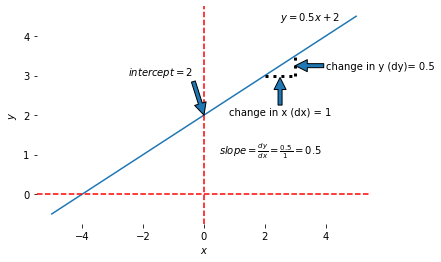

In [2]:
x = np.linspace(-5, 5, 20) 
y = 2 + 0.5*x 
plt.plot(x, y)
plt.axhline(linestyle='--', color='red')
plt.axvline(linestyle='--', color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.annotate(r'$intercept=2$', xy=(0,2), xytext=(-2.5,3), arrowprops=dict())
plt.text(2.5,4.4, r'$y = 0.5x + 2$')
plt.plot([2,3],[3,3], linewidth=3, linestyle='dotted', color='black')
plt.plot([3,3], [3,3.5], linewidth=3, linestyle='dotted', color='black');
plt.annotate(r'change in x (dx) = 1', xy=(2.5,2.95), xytext=(2.5,2), arrowprops=dict(), ha='center')
plt.annotate(r'change in y (dy)= 0.5', xy=(3,3.25), xytext=(4,3.25), arrowprops=dict(), va='center')
plt.text(0.5,1, r'$slope = \frac{dy}{dx} = \frac{0.5}{1} = 0.5$');

## Think Statistically

Here you can check [Basic Summary Statistics](https://rpubs.com/ThihaNg/826215). 


I will skip the covariance. 

**Correlation coefficient ($r$)**  

Correlation coefficient means how x values are correlated with y values, standarized between -1 and 1 by dividing with respective standard deviation values.  

$r$ value positive means increase in x is associated with increase in y and $r$ value negative means increase in x is associated with decrease in y and $r$ value 0 means there is no assocation between x and y. 

e.g - there may be positive correlation between age and height and for negative correation, if the car is decreased speed, time to travel will be increased. 

$$r = \frac{1}{n-1} Σ_{i=1}^n \frac{(x_i -x ̄)}{sd_x} \frac{(y_i -y ̄)}{sd_y}$$ 

$n$ = number of samples  
$ x̄ $ = expected value of x (arithmetic mean of x)   
$ȳ$ = expected value of y (arithemtic mean of y)  
$sd_x$ = standard deviation of x  
$sd_y$ = standard deviation of y  


In [3]:
import pandas as pd 

x = np.array([1,2,3,4,5,6])
y = np.array([25,50,60,70,110,120])
mean_x = np.mean(x)
mean_y = np.mean(y)
sdx = np.std(x, ddof=1) 
sdy = np.std(y, ddof=1) 
pd.DataFrame(dict(x=x, y=y, variation_x_from_mean_x = x-mean_x, x_mean=mean_x, 
                  y_mean=mean_y, variation_y_from_mean_y = y-mean_y, 
                  product_of_variations = ((x-mean_x)*(y-mean_y))))

,x,y,variation_x_from_mean_x,x_mean,y_mean,variation_y_from_mean_y,product_of_variations
0,1,25,-2.5,3.5,72.5,-47.5,118.75
1,2,50,-1.5,3.5,72.5,-22.5,33.75
2,3,60,-0.5,3.5,72.5,-12.5,6.25
3,4,70,0.5,3.5,72.5,-2.5,-1.25
4,5,110,1.5,3.5,72.5,37.5,56.25
5,6,120,2.5,3.5,72.5,47.5,118.75


In [4]:
r = np.sum((x-mean_x)*(y-mean_y)/(sdx * sdy))/(len(x)-1)
r

0.9792922356132759

In [5]:
np.corrcoef(x,y)[0,1]

0.9792922356132757

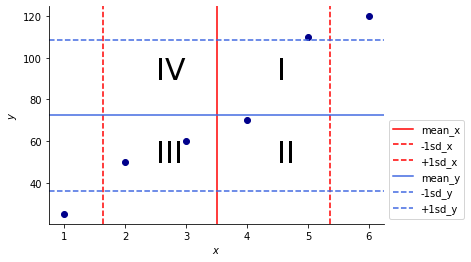

In [6]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True

plt.plot(x, y, 'o', color='darkblue')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.axvline(mean_x, linestyle='-', color='red', label='mean_x')
plt.axvline(mean_x - sdx, linestyle='--', color='red', label='-1sd_x')
plt.axvline(mean_x + sdx, linestyle='--', color='red', label='+1sd_x')

plt.text(4.5, 90, 'I', fontsize=30)
plt.text(4.5, 50, 'II', fontsize=30)
plt.text(2.5, 50, 'III', fontsize=30)
plt.text(2.5, 90, 'IV', fontsize=30)

plt.axhline(mean_y, linestyle='-', color='royalblue', label='mean_y')
plt.axhline(mean_y - sdy, linestyle='--', color='royalblue', label='-1sd_y')
plt.axhline(mean_y + sdy, linestyle='--', color='royalblue', label='+1sd_y')
plt.legend(bbox_to_anchor=(1,.5))

Suppose we took mean x and mean y as dividing lines, if there are more points in area I and III, these two variables are positively correlated and if there are more points in area II and IV, they are negatively correlated. If they spread equally, there is no association between these two variables.  

Remember **Correlation does not imply Causation**.  

### How to calculate slope and intercept of regression line?

Why am I talking about correlation? Is there any relationship between correlation and regression line?  

Recall  
$y = intercept + slope*x$  

Slope for the regression line   
$$slope = ρ_{x,y} \frac{σ_y}{\sigma_x} $$    
$\rho_{x,y}$ - pearson correlation coefficient   
$σ_x, σ_y$ - standard deviations  

Here I will not calculate detail but you can see, slope is change in y divided by change in x. From the picture, change in y is standard deviation of y and change in x is standard deviation of x. Correlation coefficient $r$ tune the slope. If $r$ is negative, slope will be negative and so on. 

From slope, you can calculate the intercept of the line. For intercept, the expected value (means) will be used. 

$$intercept = ȳ - slope*x̄$$

You can calculate the slope of regression line from covariance.  

$$slope = \frac{Σ(x_i - x̄)(y_i - y\bar)}{Σ(x_i - x̄)^2}$$


In [7]:
slope = (r*sdy/sdx) 
slope

19.000000000000004

In [8]:
intercept = mean_y - (slope*mean_x)
intercept

5.999999999999986

Text(0, 0.5, '$y$')

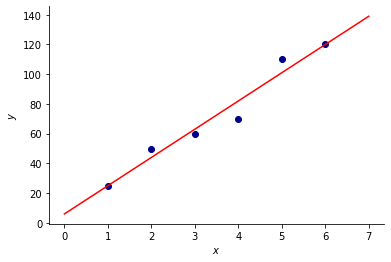

In [9]:
x_line = np.array([0, 7])
y_line = slope*x_line + intercept 

plt.plot(x, y, 'o', color='darkblue')
plt.plot(x_line, y_line, color='red')
plt.xlabel('$x$')
plt.ylabel('$y$')

### How to interpret this regression line?  

intercept = 6  
slope = 19  
For this small dataset, if you give $x$ and I can predict the value of $y$. If one unit of $x$ is changed, 19 units of $y$ will be changed. If the value of $x$ is zero, the value of $y$ is 6. Intercept does not make sense for real datasets but it helps you to calculate.For this model, the formula will be   
$y = 19x + 6$  


The predicted values for y will be on the regression line (red line). They are called **fitted values**. The differences between real y values and predicted values for y are called **residuals** (from the graph, the vertical distance between point and red line). So, here comes a new formula.  

$$y = ŷ + ϵ$$  
$y$ = actual value  
$ŷ$ = predicted value  
$ϵ$ = residuals  



In [10]:
y_pred = intercept + slope*x
residuals = y - y_pred 
pd.DataFrame(dict(x=x, y=y, predicted=y_pred, residuals=np.round(residuals, 4)))

,x,y,predicted,residuals
0,1,25,25.0,0.0
1,2,50,44.0,6.0
2,3,60,63.0,-3.0
3,4,70,82.0,-12.0
4,5,110,101.0,9.0
5,6,120,120.0,-0.0


How to handle with this residual values? Summing up is not a good solution as it contains both positive and negative number. So, we can compute the absolute values of the errors. The most used method is squaring the residuals and it eliminates the negative numbers and sum up. It is also known as **residual sum of squares (RSS)**. It is a measure of how good the model approximates the data and the method of constructing that model is called **Ordinary Least Squares (OLS)** which works by minimizing the sum of the squares of the differences between the observed dipendent variable (values of the variable being observed) in the given dataset and those predicted by the linear function. 

$RSS = Σ_{i=1} (y_i - f(x_i))^2$  

Here $f(x) = ŷ = intercept + slope * x$  


Text(0, 0.5, '$y$')

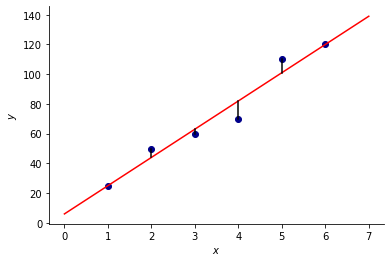

In [11]:
plt.plot(x, y, 'o', color='darkblue')
plt.plot(x_line, y_line, color='red')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='black')
plt.xlabel('$x$')
plt.ylabel('$y$')

From the graph, RSS can be calculated by summing up the squaring the lengths of the black lines.  



In [12]:
pd.DataFrame(dict(x=x, y=y, predicted=y_pred, residuals=np.round(residuals, 4), residuals_squared = np.round(residuals**2, 4)))

,x,y,predicted,residuals,residuals_squared
0,1,25,25.0,0.0,0.0
1,2,50,44.0,6.0,36.0
2,3,60,63.0,-3.0,9.0
3,4,70,82.0,-12.0,144.0
4,5,110,101.0,9.0,81.0
5,6,120,120.0,-0.0,0.0


### Is my Regression Line good?   

Regression line means prediction of y values if x values are given. In other words, regression line explains the variability of y by x. So, whether the regression line is good or not, we can compare with variability of y not given x and variability of y given x.  

Variability of y not given x means how y is varying from its mean. 


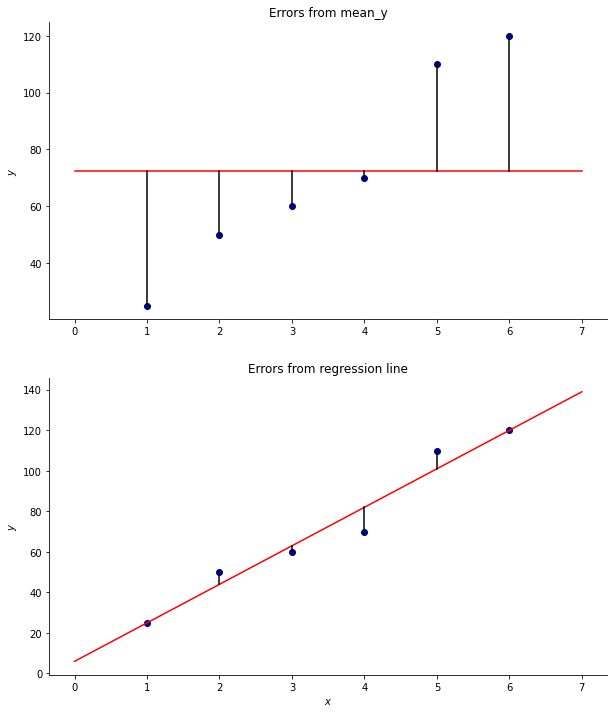

In [13]:
plt.figure(figsize=(10, 12))
plt.subplot(211)
plt.plot(x, y, 'o', color='darkblue')
plt.plot([0, 7], [mean_y, mean_y], color='red')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], mean_y], color='black')
plt.xlabel('')
plt.ylabel('$y$')
plt.title('Errors from mean_y')

plt.subplot(212)
plt.plot(x, y, 'o', color='darkblue')
plt.plot(x_line, y_line, color='red')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='black')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Errors from regression line');

Errors from regression line (variability from actual y values) means there is that difference or that distance that the regression line cannot explain the actual y value.  
Errors from mean y means the variance of y, how y values are spreading from expected value of y (mean). 
So, if we subtract errors of regression line from errors of expected value of y, we will get how much variablitiy of y values are explained by the regression line.  

$$R^2 = \frac{SE_ȳ - SE_{line}}{SE_ȳ} = 1 - \frac{SE_{line}}{SE_ȳ}$$ 

$R^2$ = r-squared or coefficient of determination  
$SE_{line}$ = sum of squared error from regression line   
$SE_ȳ$ = sum of squared error from mean y

In [14]:
sse_line = np.sum(residuals**2)
sse_y = np.sum((y - mean_y)**2)
r_2 = 1 - (sse_line/sse_y)
r_2

0.9590132827324478

$R^2$ = 0.959 means that the 95.9% of variability of y can be explained by x.  

If there are more than one explanatory variables in multiple linear regression, adjusted R squared is used. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2. 
Formula's here:  

> $Adj R^2 = 1 - (1 - R^2) \frac{n - 1}{n - k - 1}$  
$n$ = total sample size  
$k$ = numbers of explanatory variables  

so, from the formula, if there is only one explanatory variable, it is just $R^2$. 

### Uncertainty  

In real world dataset, population data are difficult to obtain and we use sample data almost all the time. Every statistical estimates have uncertainty. How can we calculate the uncertainty of the slope and intercept? Here I will use the boostrap sampling and create a little bigger dataset. 

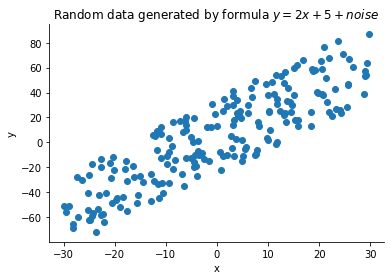

In [15]:
np.random.seed(123)
x = np.random.uniform(-30, 30, size=(200))
noise = np.random.uniform(-30, 30, size=(200))
y = 2*x + 5 + noise   # y = 2x + 5

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random data generated by formula $y = 2x + 5 + noise$');

In [16]:
r = np.corrcoef(x, y)[0,1]
sdx = np.std(x, ddof=1) 
sdy = np.std(y, ddof=1) 
slope = (r*sdy/sdx)
intercept = np.mean(y) - (slope * np.mean(x))

y_pred = slope*x + intercept  
sse_line = np.sum((y - y_pred)**2) 
sse_y = np.sum((y - np.mean(y))**2) 
r_2 = 1 - (sse_line/sse_y)

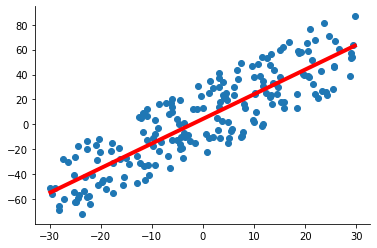

In [17]:
plt.scatter(x, y)
plt.plot([min(x), max(x)], [slope*min(x)+intercept, slope*max(x)+intercept], linewidth=4, color='red');

In [18]:
estimates = dict(slope=[], intercept=[])
for i in range(5000):
    ind = np.random.choice(np.arange(0, len(x)), size=len(x), replace=True)
    s, i = np.polyfit(x[ind], y[ind], 1) # to calculate slope and intercept 
    estimates['slope'].append(s)
    estimates['intercept'].append(i) 

lower_ci_intercept, upper_ci_intercept = np.percentile(estimates['intercept'],[2.5,97.5])
lower_ci_slope, upper_ci_slope = np.percentile(estimates['slope'], [2.5, 97.5])

print(f"Intercept : {intercept:.3f}")
print(f"Slope     : {slope:.3f}")
print(f'95% confidence interval for intercept : [{lower_ci_intercept:.3f} and {upper_ci_intercept:.3f}]')
print(f'95% confidence interval for slope     : [{lower_ci_slope:.3f} and {upper_ci_slope:.3f}]')
print(f"Standard error for intercept : {np.std(estimates['intercept']):.3f}")
print(f"Standard error for slope     : {np.std(estimates['slope']):.3f}")
print(f"R_squared : {r_2:.3f}")

Intercept : 4.425
Slope     : 1.977
95% confidence interval for intercept : [1.990 and 6.961]
95% confidence interval for slope     : [1.826 and 2.130]
Standard error for intercept : 1.266
Standard error for slope     : 0.077
R_squared : 0.761


The original data was created by this formula  
$ y = 2x + 5 + noise $  

The above values are calculated for 95% CI and it may be different a little between run times. 

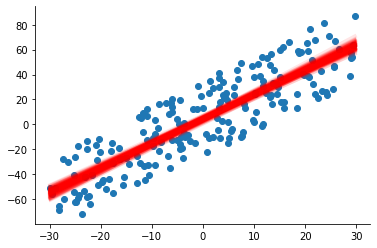

In [19]:
plt.scatter(x, y)
for i in range(100):
    s = estimates['slope'][i]
    i = estimates['intercept'][i]
    plt.plot([min(x), max(x)], [s*min(x)+i, s*max(x)+i], linewidth=4, color='red', alpha=0.1)


From `statsmodels`, we can calculate easily.  

In [20]:
import statsmodels.formula.api as smf
df = pd.DataFrame(dict(x=x, y=y))
model = smf.ols('y ~ x', df).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     629.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           2.06e-63
Time:                        07:08:35   Log-Likelihood:                -858.19
No. Observations:                 200   AIC:                             1720.
Df Residuals:                     198   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4254      1.256      3.523      0.0

Most of the terms are explained above.  
AIC and BIC are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.   

`P>[t]` is important. It is a measurement of how likely our coefficient is measured through our model by chance. 

In [21]:
print(f"P>[t] for intercept : {np.sum(np.array(estimates['intercept'])<=0)/len(estimates['intercept']):.3f}")
print(f"P>[t] for slope     : {np.sum(np.array(estimates['slope'])<=0)/len(estimates['slope']):.3f}")

P>[t] for intercept : 0.000
P>[t] for slope     : 0.000


### Think mathematically 

We can easily calculated slope and intercept from correlation coefficient and standard deviations why we need to use **minimizing a cost function with gradient descent**? As we expend to more than a single feature (in multiple linear regression), an analytical solution quickly becomes unscalable.


Suppose we have one explanatory variable $x$ that will predict the dependent variable $y$ with a function ($h_\theta(x)$). From above the regression line equation, 

$y = h_\theta(x) = mx + b$  
here I will use   
$ŷ = h_\theta(x) = θ_0 + θ_1x$   
$\theta_0$ = intercept  
$\theta_1$ = slope  
They are just notations. 
> Idea : choose $\theta_0, \theta_1$ so that $h_\theta(x)$ is close to actual values $y$ for our training examples ($x, y$). 

Residual sum of squared **RSS** from above, we calculated the residuals by subtracting actual values from predicted values, then squaring them and summing up. Here comes the **Cost Function**.  

$$J(\theta_0, \theta_1) = \frac{1}{2m}Σ_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$   
$J(\theta_0, \theta_1)$ = cost function   
$h_\theta(x^{(i)}) = θ_0 + θ_1x$   
$m$ = number of observations  

**Goal** - minimize $J(\theta_0, \theta_1)$ 
It is an optimization problem. One way to achieve is by gradient descent. Here I will not talk about gradient descent. Here, I wrote the  [basic of gradient descent in python.](https://nbviewer.org/github/thihanaung-thnn/mathematics/blob/main/gradient_descent.ipynb)   
**Outline**  
- start with some $\theta_0, \theta_1$  
- keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$ by gradient descent until we hopefully end up at a minimum.  

**Gradient descent algorithm**   
>*repeat until convergence* {  
> $θ_j := θ_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$   
> (*simultaneously update* j = 0 and j = 1  )
> }      

It means 

>*repeat until convergence* {  
> $θ_j := θ_j - \alpha \frac{1}{m} \Sigma_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}).x^{(i)} 
 $   
> (*simultaneously update* j's )
> }     

$x^{(i)}$ contains $,x_1^{(i)},x_2^{(i)},...,etc$   

I will talk about only basic and not talk about vectorization of the gradient descent. 
There are three popular types of gradient descent.  
- batch gradient descent  
- mini-batch gradient descent  
- stochastic gradient descent  
Here I will use batch gradient descent.  

**Steps**  
1. Start with random numbers for $\theta_0, \theta_1, ...$ if there are more explanatory variables $\theta_2, \theta_3$, etc.  
2. choose learning rate $\alpha$. Be careful, if learning rate is small, it will need more iterations to converge and if learning rate is large, it will fail to converge.   
3. calculate the partial differentiations of the **cost function**. 
4. multiply this result to learning rate and subtract the corresponding $\theta$ values and assign it. Do all θ's in a loop.  
5. Repeat this process until it converges. 


In [22]:
def cost(thetas, x, y):
    m = len(x)  
    y_pred = thetas[0] + thetas[1]*x
    return sum((y_pred - y)**2)/(2*m)  

def gradient_descent(thetas, x, y, alpha, iters):
    m = len(x) 
    for i in range(iters):
        thetas[0] = thetas[0] - (alpha/m)*sum((thetas[0] + thetas[1]*x) - y)
        thetas[1] = thetas[1] - (alpha/m)*sum(((thetas[0] + thetas[1]*x) - y)*x)
        if i%20==0:
            print(f'Loop{i+1}==Cost:{cost(thetas, x, y):.3f}, theta_0:{thetas[0]:.3f}, theta_1:{thetas[1]:.3f}')

In [23]:
# create the data 
xs = np.random.uniform(-10, 10, size=200) 
noise = np.random.uniform(-1, 1, size=200)
ys = 2*xs + 5 + noise  

thetas = np.random.normal(size=2)
learning_rate = 0.01  

gradient_descent(thetas, xs, ys, learning_rate, iters=500)

Loop1==Cost:35.853, theta_0:-0.651, theta_1:1.070
Loop21==Cost:10.707, theta_0:0.387, theta_1:2.138
Loop41==Cost:7.290, theta_0:1.214, theta_1:2.114
Loop61==Cost:4.978, theta_0:1.894, theta_1:2.094
Loop81==Cost:3.414, theta_0:2.454, theta_1:2.078
Loop101==Cost:2.355, theta_0:2.914, theta_1:2.064
Loop121==Cost:1.639, theta_0:3.293, theta_1:2.053
Loop141==Cost:1.154, theta_0:3.605, theta_1:2.044
Loop161==Cost:0.826, theta_0:3.861, theta_1:2.036
Loop181==Cost:0.604, theta_0:4.072, theta_1:2.030
Loop201==Cost:0.454, theta_0:4.245, theta_1:2.025
Loop221==Cost:0.352, theta_0:4.388, theta_1:2.020
Loop241==Cost:0.283, theta_0:4.505, theta_1:2.017
Loop261==Cost:0.237, theta_0:4.602, theta_1:2.014
Loop281==Cost:0.205, theta_0:4.681, theta_1:2.012
Loop301==Cost:0.184, theta_0:4.746, theta_1:2.010
Loop321==Cost:0.169, theta_0:4.800, theta_1:2.008
Loop341==Cost:0.160, theta_0:4.844, theta_1:2.007
Loop361==Cost:0.153, theta_0:4.881, theta_1:2.006
Loop381==Cost:0.149, theta_0:4.911, theta_1:2.005
Loo

It reached the target values. 

In [24]:
thetas = np.random.normal(size=2)
learning_rate = 0.001  
gradient_descent(thetas, xs, ys, learning_rate, iters=500)

Loop1==Cost:58.877, theta_0:-1.129, theta_1:0.623
Loop21==Cost:28.204, theta_0:-0.988, theta_1:1.386
Loop41==Cost:19.766, theta_0:-0.860, theta_1:1.772
Loop61==Cost:17.107, theta_0:-0.741, theta_1:1.967
Loop81==Cost:15.965, theta_0:-0.627, theta_1:2.065
Loop101==Cost:15.233, theta_0:-0.516, theta_1:2.113
Loop121==Cost:14.625, theta_0:-0.408, theta_1:2.136
Loop141==Cost:14.064, theta_0:-0.303, theta_1:2.147
Loop161==Cost:13.531, theta_0:-0.199, theta_1:2.150
Loop181==Cost:13.019, theta_0:-0.098, theta_1:2.151
Loop201==Cost:12.528, theta_0:0.001, theta_1:2.150
Loop221==Cost:12.056, theta_0:0.098, theta_1:2.148
Loop241==Cost:11.601, theta_0:0.193, theta_1:2.145
Loop261==Cost:11.164, theta_0:0.287, theta_1:2.143
Loop281==Cost:10.744, theta_0:0.379, theta_1:2.140
Loop301==Cost:10.340, theta_0:0.469, theta_1:2.137
Loop321==Cost:9.951, theta_0:0.557, theta_1:2.135
Loop341==Cost:9.577, theta_0:0.643, theta_1:2.132
Loop361==Cost:9.217, theta_0:0.728, theta_1:2.130
Loop381==Cost:8.871, theta_0:0

It still doesn't reach the target values as learning rate is small. 

In [25]:
thetas = np.random.normal(size=2)
learning_rate = 0.1  
gradient_descent(thetas, xs, ys, learning_rate, iters=100)

Loop1==Cost:788.466, theta_0:0.508, theta_1:8.983
Loop21==Cost:275275730757652064.000, theta_0:3851923.964, theta_1:128718925.921
Loop41==Cost:97085506723409674569600689242112.000, theta_0:72338657391523.141, theta_1:2417328315022448.500
Loop61==Cost:34240561598143636821351633436021357131442683904.000, theta_0:1358512637301883666432.000, theta_1:45397180192215158226944.000
Loop81==Cost:12076118239732680278768510474336468660495336582829981057417216.000, theta_0:25512729324242454359291461632.000, theta_1:852554432344580115240547516416.000


It does not converge. So, it is important to choose correct learning rates. 

**Normal Equation**  

This equation is derived from linear algebra method where  

$$
x^{(i)} = 
\begin{pmatrix}
x_0^{(i)} \\ x_1^{(i)} \\ \vdots \\ x_n^{(i)}
\end{pmatrix}, 
X = 
\begin{pmatrix}
(x^{(1)})^T \\ (x^{(2)})^T \\ \vdots \\ (x^{(m)})^T 
\end{pmatrix}, 
y = 
\begin{pmatrix}
y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}
\end{pmatrix}, 
\theta = 
\begin{pmatrix}
\theta_1 \\ \theta_2 \\ \vdots \\ \theta_n
\end{pmatrix}$$   

$$y = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n $$
$$y = \theta^T.X$$  
From that, we can derived θ by  
$$\theta = (X^TX)^{-1}X^Ty$$  

In [26]:
x0 = np.repeat(1, 200).reshape(-1, 1)
x1 = np.random.uniform(-10, 10, size=(200,1)) 
x2 = np.random.uniform(-20, 20, size=(200,1))
X = np.hstack((x0, x1, x2))
noise = np.random.uniform(-1, 1, size=(200,1))
ys = 2*x1 + 4*x2 + 5 + noise 

thetas = np.linalg.inv(X.T @ X) @ (X.T @ ys)
thetas

array([[4.92013777],
       [1.99735005],
       [4.00033035]])

**Difference between Gradient descent and Normal equation**  

|Gradient Descent |Normal Equation|
|-----------------|---------------|
|- Need to choose α|- No need to choose α|
|- Needs many iterations |- Do not need to iterate|
|- Works well even when $n$ is large | - slow if $n$ is very large|   

**Regularization** - here I will not talk about overfitting and underfitting as the **bias-variance trade-off** is also a huge topic. Regularization formula is nothing special just adding regularization terms to cost function.   
**L2 regularization** is by adding $λ.\Sigma_{j=1}^n \theta_j^2 $ (sum of square of coefficients) and is known as **Ridge Regression**.  

**L1 regularization** is by adding $\lambda. \Sigma_{j=1}^n |\theta_n|$ (absolute of values of coefficients) and known as **Lasso Regression**.   


Here I compared the [Lasso and Ridge](https://nbviewer.org/github/thihanaung-thnn/mathematics/blob/main/lasso_ridge.ipynb).  

### Multiple Linear Regression  


If there are more than one explainatory variables, it is called multiple linear regression. It is the same as simple linear regression, just adding more variables to explain the variability of y.  

In [27]:
x1 = np.random.uniform(-10, 10, size=(100)) 
x2 = np.random.uniform(-5, 5, size=(100)) 
x3 = np.random.uniform(-20, 20, size=(100))
noise = np.random.uniform(-5,5,size=(100))
y = 3*x1 + 2*x2 - 3*x3 + 10 + noise 
df = pd.DataFrame(dict(x1 = x1, x2 = x2, x3 = x3, y = y))
model = smf.ols('y ~ x1 + x2 + x3', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6249.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          6.87e-110
Time:                        07:08:36   Log-Likelihood:                -253.01
No. Observations:                 100   AIC:                             514.0
Df Residuals:                      96   BIC:                             524.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2144      0.314     32.544      0.0

Formula here is  
$y = 3x_1 + 2x_2 - 3x_3 + 10 + noise$  

If $x_1$ increase in 1 unit, $y$ will also increase in 3 unit. If $x_3$ increases in 1 unit, $y$ will decrease in 3 unit. From $R^2$, this model can explain, 99.4 percent of the variability of y. 

### Limitations of Linear Regression  

- Anscombe's Quartet illustrates the pitfalls of relying on pure calculation.  
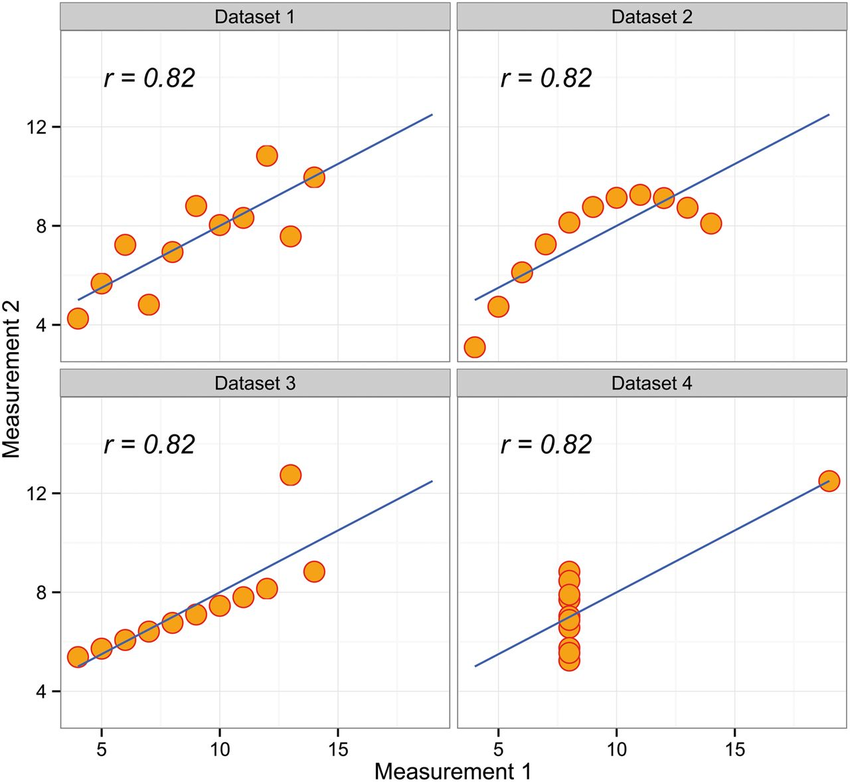

Each graph results in the same calculated regression line and so, the assumptions of linearity comes into play. 

### Linearity Assumptions 

Linearity assumptions are like checklists for your linear model whether these explanatory variables can be used for linear regression.  

**Assumption 1 - Linear Relationship**   
The relations between the independent and dependent variables must be linear. 

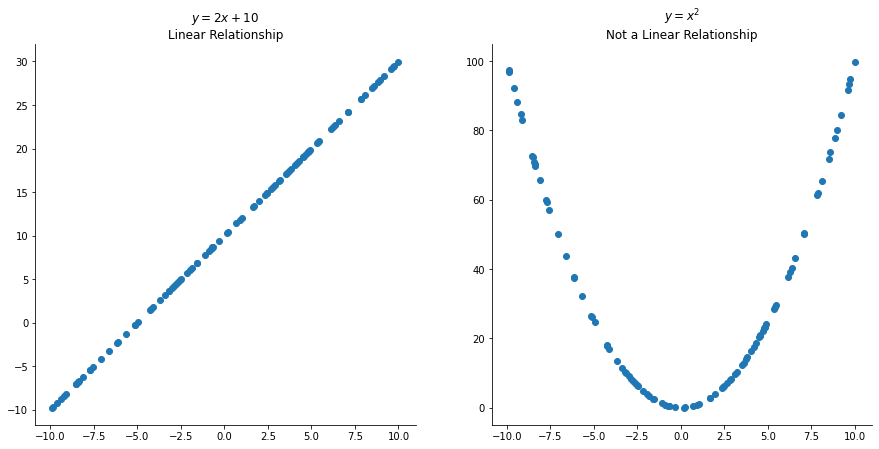

In [28]:
x1 = np.random.uniform(-10, 10, size=100) 
y1 = 2*x1 + 10 
y2 = x1**2 
plt.figure(figsize=(15, 7))
plt.subplot(121) 
plt.scatter(x1, y1)
plt.title('$y = 2x + 10$\nLinear Relationship')
plt.subplot(122)
plt.scatter(x1, y2)
plt.title('$y = x^2$\nNot a Linear Relationship');

**Assumption 2 - Normality of the residuals**  

Residuals are differences of actual values and predicted values. These residuals follows the normal distribution known as gaussian distribution. There are many ways to test. Histograms and quantile-quantile plots are best ways to visualize and many statistical tests to check the normality of the distributions. Omnibus from OLS summary table is one of the tests to test the normality of residuals.  



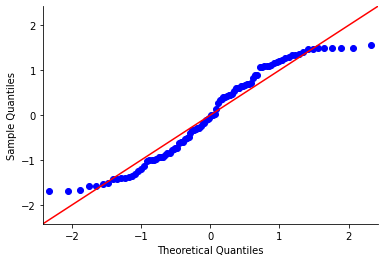

In [29]:
import statsmodels.api as sm
np.random.seed(111)
x1 = np.random.uniform(-10, 10, size=(100)) 
noise = np.random.uniform(-2,2,size=(100))
y = 3*x1 + 10 + noise 
df = pd.DataFrame(dict(x1 = x1, y = y))
model = smf.ols('y ~ x1', data = df).fit()
residuals = model.resid  
fig = sm.qqplot(residuals, line='45', fit=True);

When looking at QQplot, the points should be rest upon the straight (red) line. 

In [30]:
from scipy.stats import normaltest  
list(zip(['Statistics', 'p_value'], normaltest(residuals)))

[('Statistics', 52.7231984965359), ('p_value', 3.558794513303064e-12)]

**Assumption 3 - No or little Multicollinearity**  
Multicollinearity means the explanatory variables are strongly correlated to each other. To reduce these effects, we have to do the dimentionality reduction if there are too many explanatory variables or there will be **Curse of dimensionality**.  

eg.

In [31]:
x1 = np.random.uniform(-10, 10, size=(1000)) 
x2 = np.random.uniform(-10, 10, size=(1000)) 
x3 = 4*x1 
noise = np.random.uniform(-5,5,size=(1000))
y = 3*x1 + 3*x2 + 3*x3 + 10 + noise 
df = pd.DataFrame(dict(x1 = x1, x2 = x2, x3 = x3, y = y))
model = smf.ols('y ~ x1 + x2 + x3', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.660e+05
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        07:08:37   Log-Likelihood:                -2484.7
No. Observations:                1000   AIC:                             4975.
Df Residuals:                     997   BIC:                             4990.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0118      0.092    108.686      0.0

From above example, the dataset was created with the formula $y = 3x_1 + 3x_2 + 3*x_3 + 10 + noise$. But the regression cannot calculate the approximately corrected values as $x_3$ is created from $x_1$ and they are stronlgy correlated. You can check by correlation matrix. 

In [32]:
df.drop('y', axis=1).corr()

,x1,x2,x3
x1,1.000000,0.048629,1.000000
x2,0.048629,1.000000,0.048629
x3,1.000000,0.048629,1.000000


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
print({df.columns[i]: variance_inflation_factor(df.values, i) for i in range(0, df.shape[1]-1)})

{'x1': inf, 'x2': 3.9343920753074064, 'x3': inf}


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Value start from 1 to infinity. VIF of value 1 is best and indicates that there is no multicollinearity and value of higher than 5 or 10 indicates that there is a problem. From above data,it shows that x2 is ok but there is correlation between x1 and x3. 

**Assumption 4 - Homoscedasticty**   
Homoscedasticity means that the error (residuals) should exist along the values of the dependent variable. eg- if we plot the residuals on y-axis and dependent variable (y) on x-axis. 

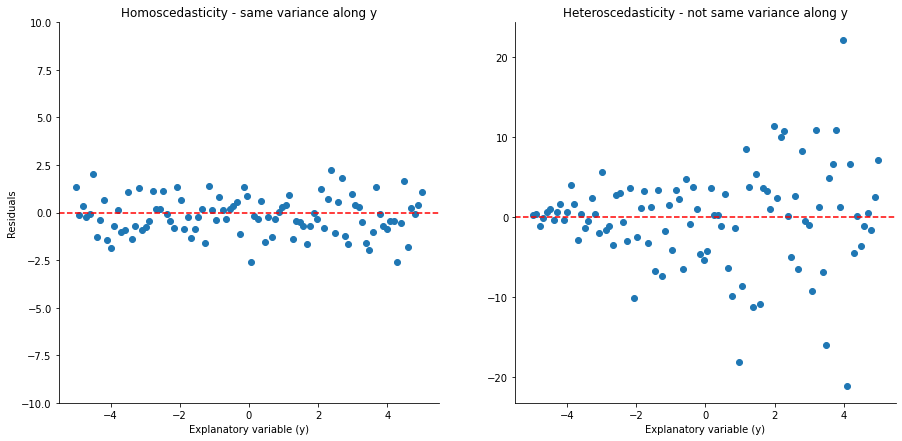

In [34]:
y = np.linspace(-5,5,100)
res_1 = np.random.normal(0,1,100) 
res_2 = np.random.normal(0,1,100)*np.linspace(1,10,100) 
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(y, res_1,'o')
plt.axhline(linestyle='--', color='red')
plt.xlabel('Explanatory variable (y)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity - same variance along y')
plt.ylim(-10, 10)
plt.subplot(122)
plt.plot(y, res_2, 'o')
plt.axhline(linestyle='--', color='red')
plt.title('Heteroscedasticity - not same variance along y')
plt.xlabel('Explanatory variable (y)');

Residuals should follow homoscedasticity. There are also tests like Cook's distance to measure homoscedasticity. If it violates homoscedasticity, there may be some outliers or you have to preprocess the input data or have to do transformation. 


References: 
- [Machine Learning - Stanford University](https://www.coursera.org/learn/machine-learning)  
- [Python for Machine Learning & Data Science - Jose Portilla](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)
- [Regression Diagnostics from statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html)  
- [Assumptions of linear regression - towards datascience](https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b) 
- [Gentle introduction to normality tests in python - machinelearningmastery](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)